In [ ]:
pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
import pandas as pd
from google.colab import files
print(tf.version.VERSION)

2.7.0


In [ ]:
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/Dataset/ECG'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATADIR = '/content/drive/MyDrive/Colab Notebooks/DS2/ECG'
CATEGORIES = ['MI Patient', 'Normal']

In [ ]:
IMG_SIZE = 100

training_data = []
Number_of_DATA_Per_Label = []
def create_training_data():
    for category in CATEGORIES: 
        counter = 0
        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
                counter+=1   
            except Exception as e: 
                pass
        Number_of_DATA_Per_Label.append(counter)        

create_training_data()

print(len(training_data))


100%|██████████| 240/240 [00:07<00:00, 31.70it/s]

479


In [ ]:
print(CATEGORIES)

['MI Patient', 'Normal']


In [ ]:
print(Number_of_DATA_Per_Label)

[239, 240]


In [ ]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
1
0
1
0
1
0


In [ ]:
TD = np.array(training_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
print(TD[1: 10])

[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  1]
 [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  1]
 [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
  1]
 [array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 2

In [ ]:
dataset = pd.DataFrame({'Category': TD[:, 0], 'Label': TD[:, 1]})

In [ ]:
print(dataset)

                                              Category Label
0    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
1    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
2    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
3    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
4    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
..                                                 ...   ...
474  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
475  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
476  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0
477  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     1
478  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...     0

[479 rows x 2 columns]


In [ ]:
dataset.head()

,Category,Label
0,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
1,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
2,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
3,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1
4,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",1


In [ ]:
X = []
y = []


for features,label in training_data:
    X.append(features)
    np.array((y, label))
    y.append(label)
    

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y=np.array(y)

[[[[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  ...

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]

  [[255]
   [255]
   [255]
   ...
   [255]
   [255]
   [255]]]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  import sys


In [ ]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [ ]:
x_train.shape

(359, 100, 100, 1)

In [ ]:
y_train.shape

(359,)

In [ ]:
x_test.shape

(120, 100, 100, 1)

In [ ]:
y_test.shape

(120,)

In [ ]:
def create_model(X, y):
    X = X/255.0

    dense_layers = [0]
    layer_sizes = [128]
    conv_layers = [1]

    for dense_layer in dense_layers:
        for layer_size in layer_sizes:
            for conv_layer in conv_layers:
                NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
                print(NAME)

                model = Sequential()

                model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
                model.add(Activation('relu'))
                BatchNormalization()
                model.add(MaxPooling2D(pool_size=(2, 2)))

                for l in range(conv_layer-1):
                    model.add(Conv2D(layer_size, (3, 3)))
                    model.add(Activation('relu'))
                    model.add(MaxPooling2D(pool_size=(2, 2)))

                model.add(Flatten())

                for _ in range(dense_layer):
                    model.add(Dense(layer_size))
                    model.add(Activation('relu'))

                model.add(Dense(1))
                model.add(Activation('sigmoid'))

                tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

                model.compile(loss='binary_crossentropy',
                              optimizer='Adamax',
                              metrics=['accuracy'],
                              )
    
    return model
    
# Create a basic model instance
model = create_model(X,y)

# Display the model's architecture
model.summary()

1-conv-128-nodes-0-dense-1640005399
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       1280      
                                                                 
 activation (Activation)     (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 307328)            0         
                                                                 
 dense (Dense)               (None, 1)                 307329    
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                    

In [ ]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                    save_weights_only=True,
                                                    verbose=1)
model.fit(X, y, batch_size=40, epochs=30, validation_split=0.2, callbacks=[cp_callback])

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1369.9738 - accuracy: 0.4413
Epoch 00001: saving model to training_1/cp.ckpt
10/10 [==============================] - 12s 1s/step - loss: 1369.9738 - accuracy: 0.4413 - val_loss: 676.3249 - val_accuracy: 0.4896
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 430.7007 - accuracy: 0.4961
Epoch 00002: saving model to training_1/cp.ckpt
10/10 [==============================] - 6s 562ms/step - loss: 430.7007 - accuracy: 0.4961 - val_loss: 80.1502 - val_accuracy: 0.4896
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 141.9941 - accuracy: 0.5170
Epoch 00003: saving model to training_1/cp.ckpt
10/10 [==============================] - 6s 583ms/step - loss: 141.9941 - accuracy: 0.5170 - val_loss: 95.8601 - val_accuracy: 0.5104
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 46.1210 - accuracy: 0.5561
Epoch 00004: saving model to training_1/cp.ckpt
10/10 [===============

In [ ]:
os.listdir(checkpoint_dir)

['cp.ckpt.data-00000-of-00001', 'checkpoint', 'cp.ckpt.index']

In [ ]:
# Create a basic model instance
model = create_model(X, y)

# Evaluate the model
loss, acc = model.evaluate(X, y, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

1-conv-128-nodes-0-dense-1640005682
15/15 - 3s - loss: 23.7217 - accuracy: 0.5010 - 3s/epoch - 185ms/step
Untrained model, accuracy: 50.10%


In [ ]:
# Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(X, y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

15/15 - 2s - loss: 1.1235e-11 - accuracy: 1.0000 - 2s/epoch - 145ms/step
Restored model, accuracy: 100.00%


In [ ]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size=40
# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*batch_size)

# Create a new model instance
model = create_model(X, y)

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

model.fit(X, 
          y,
          epochs=50, 
          batch_size=batch_size, 
          callbacks=[cp_callback],
          validation_data=(X, y),
          verbose=0)



1-conv-128-nodes-0-dense-1640005745

Epoch 00017: saving model to training_2/cp-0017.ckpt

Epoch 00034: saving model to training_2/cp-0034.ckpt

Epoch 00050: saving model to training_2/cp-0050.ckpt


In [ ]:
os.listdir(checkpoint_dir)

['cp-0000.ckpt.data-00000-of-00001',
 'cp-0017.ckpt.index',
 'cp-0017.ckpt.data-00000-of-00001',
 'cp-0000.ckpt.index',
 'cp-0050.ckpt.data-00000-of-00001',
 'checkpoint',
 'cp-0034.ckpt.data-00000-of-00001',
 'cp-0034.ckpt.index',
 'cp-0050.ckpt.index']

In [ ]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp-0050.ckpt'

In [ ]:
# Create a new model instance
model = create_model(X, y)

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(X, y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1-conv-128-nodes-0-dense-1640006285
15/15 - 2s - loss: 1.0049e-13 - accuracy: 1.0000 - 2s/epoch - 161ms/step
Restored model, accuracy: 100.00%


In [ ]:
# Save the weights
model.save_weights('./checkpoints/my_checkpoint')

# Create a new model instance
model = create_model(X, y)

# Restore the weights
model.load_weights('./checkpoints/my_checkpoint')

# Evaluate the model
loss, acc = model.evaluate(X, y, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1-conv-128-nodes-0-dense-1640006315
15/15 - 1s - loss: 1.0049e-13 - accuracy: 1.0000 - 1s/epoch - 98ms/step
Restored model, accuracy: 100.00%


In [ ]:
# Create and train a new model instance.
model = create_model(X, y)
model.fit(X, y, epochs=5)

# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/ECG_Classificaton_CNN_Model') 

1-conv-128-nodes-0-dense-1640006376
Epoch 1/5
15/15 [==============================] - 7s 447ms/step - loss: 502.6375 - accuracy: 0.4885
Epoch 2/5
15/15 [==============================] - 7s 443ms/step - loss: 57.6212 - accuracy: 0.5595
Epoch 3/5
15/15 [==============================] - 7s 455ms/step - loss: 10.0721 - accuracy: 0.7495
Epoch 4/5
15/15 [==============================] - 7s 459ms/step - loss: 3.9595 - accuracy: 0.8518
Epoch 5/5
15/15 [==============================] - 7s 464ms/step - loss: 2.0188 - accuracy: 0.8894
INFO:tensorflow:Assets written to: saved_model/ECG_Classificaton_CNN_Model/assets


In [ ]:
# my_model directory
!ls saved_model/ECG_Classificaton_CNN_Model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/ECG_Classificaton_CNN_Model

assets	keras_metadata.pb  saved_model.pb  variables
assets	keras_metadata.pb  saved_model.pb  variables


In [ ]:
new_model = tf.keras.models.load_model('saved_model/ECG_Classificaton_CNN_Model')

# Check its architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 98, 98, 128)       1280      
                                                                 
 activation_10 (Activation)  (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 307328)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 307329    
                                                                 
 activation_11 (Activation)  (None, 1)                 0         
                                                      

In [ ]:
# Evaluate the restored model
loss, acc = new_model.evaluate(X, y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(X).shape)

15/15 - 3s - loss: 5.4268e-05 - accuracy: 1.0000 - 3s/epoch - 168ms/step
Restored model, accuracy: 100.00%
(479, 1)


In [ ]:
# Create and train a new model instance.
model = create_model(X, y)
model.fit(X, y, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('ECG_Classificaton_CNN_Model.h5') 

1-conv-128-nodes-0-dense-1640006735
Epoch 1/5
15/15 [==============================] - 7s 449ms/step - loss: 536.3438 - accuracy: 0.5177
Epoch 2/5
15/15 [==============================] - 7s 436ms/step - loss: 118.0504 - accuracy: 0.5115
Epoch 3/5
15/15 [==============================] - 6s 429ms/step - loss: 13.3442 - accuracy: 0.6889
Epoch 4/5
15/15 [==============================] - 6s 418ms/step - loss: 1.6596 - accuracy: 0.8831
Epoch 5/5
15/15 [==============================] - 6s 425ms/step - loss: 0.4421 - accuracy: 0.9457


In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('ECG_Classificaton_CNN_Model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 128)       1280      
                                                                 
 activation_12 (Activation)  (None, 98, 98, 128)       0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 128)      0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 307328)            0         
                                                                 
 dense_6 (Dense)             (None, 1)                 307329    
                                                                 
 activation_13 (Activation)  (None, 1)                 0         
                                                      

In [ ]:
loss, acc = new_model.evaluate(X, y, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

15/15 - 2s - loss: 0.0467 - accuracy: 0.9833 - 2s/epoch - 117ms/step
Restored model, accuracy: 98.33%


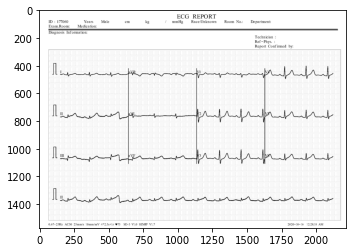

[[2.8608229e-15]]
MI Patient


In [ ]:
def prepare(filepath):
    IMG_SIZE = 100  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    plt.imshow(img_array, cmap='gray')  
    plt.show()
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tf.keras.models.load_model("ECG_Classificaton_CNN_Model.h5")

prediction = model.predict([prepare('/content/drive/MyDrive/Colab Notebooks/DS2/ECG/MI Patient/MI(103).jpg')])
print(prediction)  
print(CATEGORIES[int(prediction[0][0])])

In [ ]:
files.download("ECG_Classificaton_CNN_Model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>